In [1]:
import tensorflow as tf
print("TF Version:", tf.__version__)
import tensorflow_hub as hub
print("TF hub Version:", hub.__version__)
print("GPU", "availabe" if tf.config.list_physical_devices("GPU") else "not availabe")

TF Version: 2.6.0
TF hub Version: 0.12.0
GPU availabe


In [2]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2973218999528947669, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11345264640
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12266245403683430098
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [10]:
import os 
import numpy as np
np.random.seed(777)
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import keras.backend as k


from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model

In [11]:
train_dir = '/content/drive/MyDrive/Tea Omdena/Fresh v.1 80-20/Train'
test_dir = '/content/drive/MyDrive/Tea Omdena/Fresh v.1 80-20/Test'

In [14]:
for root,dirs,files in os.walk(train_dir):
    print (root, len(files))
print("-"*70)
for root,dirs,files in os.walk(test_dir):
    print (root, len(files))

/content/drive/MyDrive/Tea Omdena/Fresh v.1 80-20/Train 0
/content/drive/MyDrive/Tea Omdena/Fresh v.1 80-20/Train/Best 929
/content/drive/MyDrive/Tea Omdena/Fresh v.1 80-20/Train/Below Best 574
/content/drive/MyDrive/Tea Omdena/Fresh v.1 80-20/Train/Poor 535
----------------------------------------------------------------------
/content/drive/MyDrive/Tea Omdena/Fresh v.1 80-20/Test 0
/content/drive/MyDrive/Tea Omdena/Fresh v.1 80-20/Test/Poor 134
/content/drive/MyDrive/Tea Omdena/Fresh v.1 80-20/Test/Best 232
/content/drive/MyDrive/Tea Omdena/Fresh v.1 80-20/Test/Below Best 144


In [37]:
output_classes = 3
batch_size = 32
img_height, img_width = 224,224
input_shape = (img_height, img_width, 3)
epochs = 15
nb_train_samples = 2038
nb_test_samples = 510

In [38]:
random_seed = np.random.seed(1142)
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = True,
    class_mode='categorical')


test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = False,
    class_mode='categorical')

Found 2038 images belonging to 3 classes.
Found 510 images belonging to 3 classes.


In [39]:
from keras.models import Sequential
model = Sequential()

model.add(VGG16(weights = "imagenet", include_top=False, pooling = 'avg'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=output_classes, activation='softmax'))
adam_opt = Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-5)

model.layers[0].trainable = True

In [40]:
model.compile(optimizer= adam_opt,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 14,716,227
Trainable params: 14,716,227
Non-trainable params: 0
_________________________________________________________________


In [41]:

history = model.fit_generator(
  train_generator,
  steps_per_epoch = nb_train_samples // batch_size,
  epochs = epochs,
  validation_data = test_generator,
  validation_steps = nb_test_samples // batch_size)

Epoch 1/15
63/63 [==============================] - 85s 1s/step - loss: 1.0555 - accuracy: 0.4651 - val_loss: 0.7934 - val_accuracy: 0.6417
Epoch 2/15
63/63 [==============================] - 84s 1s/step - loss: 0.7068 - accuracy: 0.6740 - val_loss: 0.5253 - val_accuracy: 0.7958
Epoch 3/15
63/63 [==============================] - 83s 1s/step - loss: 0.4885 - accuracy: 0.7961 - val_loss: 0.3592 - val_accuracy: 0.8583
Epoch 4/15
63/63 [==============================] - 83s 1s/step - loss: 0.3446 - accuracy: 0.8664 - val_loss: 0.2981 - val_accuracy: 0.8813
Epoch 5/15
63/63 [==============================] - 82s 1s/step - loss: 0.2301 - accuracy: 0.9182 - val_loss: 0.2389 - val_accuracy: 0.9083
Epoch 6/15
63/63 [==============================] - 81s 1s/step - loss: 0.1641 - accuracy: 0.9397 - val_loss: 0.1535 - val_accuracy: 0.9542
Epoch 7/15
63/63 [==============================] - 81s 1s/step - loss: 0.0947 - accuracy: 0.9697 - val_loss: 0.1849 - val_accuracy: 0.9208
Epoch 8/15
63/63 [==

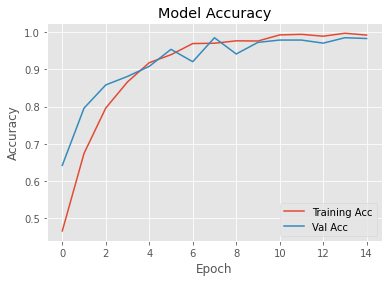

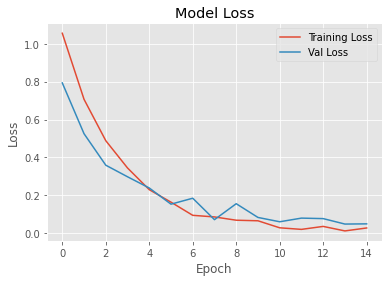

In [42]:
plt.style.use("ggplot")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Acc', 'Val Acc'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Val Loss'], loc='upper right')
plt.show()

In [43]:
filename = test_generator.filenames
truth = test_generator.classes
label = test_generator.class_indices
indexlabel = dict((value, key) for key, value in label.items())

predicts = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size, verbose=1)
predict_class = np.argmax(predicts, axis=1)
errors = np.where(predict_class != truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))

15/15 [==============================] - 13s 806ms/step
No of errors = 8/510


Confusion Matrix
[[142   2   0]
 [  3 229   0]
 [  1   2 131]]


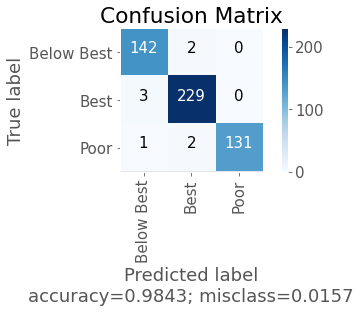

<Figure size 2160x2160 with 0 Axes>

In [44]:
from sklearn import preprocessing
plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 15})

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(truth,predict_class)

labels = []
for k,v in indexlabel.items():
    labels.append(v)
    
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix')

    print(cm)
#     fig = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass)) 
    plt.figure(figsize=(30,30))


plot_confusion_matrix(cm, classes=labels,
                      title='Confusion Matrix')

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
y_pred = predicts
y_pred_probabilities=y_pred

y_pred = np.argmax(y_pred,axis = 1) 
y_actual = test_generator.classes

classnames=[]
for classname in test_generator.class_indices:
    classnames.append(classname)
target_names = classnames
print(classification_report(y_actual, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  Below Best       0.97      0.99      0.98       144
        Best       0.98      0.99      0.98       232
        Poor       1.00      0.98      0.99       134

    accuracy                           0.98       510
   macro avg       0.99      0.98      0.98       510
weighted avg       0.98      0.98      0.98       510



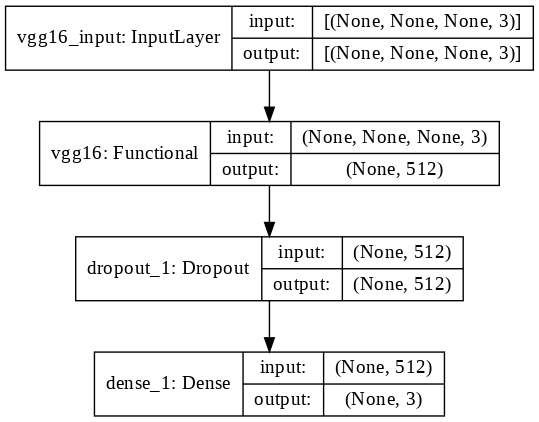

In [46]:
import tensorflow.keras as keras
keras.utils.plot_model(model, show_shapes=True, dpi=100)


In [47]:
model.save('/content/drive/MyDrive/Tea Omdena/Models/VGG16-tea-model(v1).h5')
model.save_weights('/content/drive/MyDrive/Tea Omdena/Models/VGG16-tea-Weights(v1).h5')